## Getting Data 

In [1]:
import quandl
data = quandl.get("EOD/HD", authtoken="dusYQoyrxzBKnR4esBk9")

## Imports 

In [2]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [3]:
dataset = pd.DataFrame(data['Close'])

In [4]:
# Last n values become Nan
data['Predictions'] = data['Close'].shift(-10)

In [5]:
y = data['Predictions']

In [6]:
x = data['Close']

In [7]:
x = x[:-10]
y = y[:-10]

In [8]:
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [11]:
x_test.shape

(216, 1)

In [12]:
x_train.shape

(864, 1)

In [13]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [14]:
x_train = x_train.reshape(x_train.shape[0],  x_train.shape[1],1)

In [15]:
x_train.shape

(864, 1, 1)

In [16]:
x_test = x_test.reshape(x_test.shape[0],  x_test.shape[1], 1)

## Model Creation and Compilation 

In [28]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(100,input_shape = (x_train.shape[1],1), return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(50, return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
    
])

In [29]:
start = time.time()
model.compile(loss = 'mean_squared_error', optimizer='adam')
print('compilation time: {}'.format(time.time() - start))

compilation time: 0.04309558868408203


In [30]:
model.fit(x_train, y_train, batch_size=64, epochs=50,verbose = True)

Train on 864 samples
Epoch 1/50
864/864 [==============================] - 2s 2ms/sample - loss: 14622.4816
Epoch 2/50
864/864 [==============================] - 0s 92us/sample - loss: 14535.1650
Epoch 3/50
864/864 [==============================] - 0s 94us/sample - loss: 14334.4788
Epoch 4/50
864/864 [==============================] - 0s 96us/sample - loss: 13837.3796
Epoch 5/50
864/864 [==============================] - 0s 90us/sample - loss: 12668.0103
Epoch 6/50
864/864 [==============================] - 0s 100us/sample - loss: 10479.4624
Epoch 7/50
864/864 [==============================] - 0s 99us/sample - loss: 7166.3630
Epoch 8/50
864/864 [==============================] - 0s 93us/sample - loss: 3781.6247
Epoch 9/50
864/864 [==============================] - 0s 102us/sample - loss: 1723.4800
Epoch 10/50
864/864 [==============================] - 0s 85us/sample - loss: 1064.0370
Epoch 11/50
864/864 [==============================] - 0s 87us/sample - loss: 1013.0837
Epoch 12/50
8

In [33]:
model.evaluate(x_test, y_test)

216/216 [==============================] - 1s 4ms/sample - loss: 884.2873


884.287267614294

In [31]:
pred = model.predict(x_test)

In [23]:
y_test                                         

array([[114.95],
       [110.98],
       [ 99.64],
       [116.93],
       [116.5 ],
       [159.38],
       [112.24],
       [113.35],
       [ 82.41],
       [135.6 ],
       [190.19],
       [135.04],
       [116.89],
       [100.67],
       [133.53],
       [104.12],
       [182.58],
       [131.57],
       [185.98],
       [114.63],
       [ 90.82],
       [ 93.26],
       [113.86],
       [158.13],
       [ 88.93],
       [135.6 ],
       [153.5 ],
       [156.64],
       [ 79.84],
       [137.96],
       [156.46],
       [148.21],
       [ 80.03],
       [ 99.64],
       [162.71],
       [172.33],
       [182.  ],
       [156.59],
       [130.45],
       [134.31],
       [146.54],
       [131.85],
       [ 79.  ],
       [105.37],
       [ 76.99],
       [128.59],
       [135.01],
       [ 98.24],
       [147.8 ],
       [ 76.24],
       [122.2 ],
       [150.79],
       [128.93],
       [131.35],
       [116.43],
       [110.37],
       [ 79.86],
       [130.43],
       [146.34

In [32]:
pred

array([[[108.09882 ]],

       [[108.9688  ]],

       [[117.196846]],

       [[120.24959 ]],

       [[124.44954 ]],

       [[123.120674]],

       [[117.242455]],

       [[123.71736 ]],

       [[116.688934]],

       [[126.30662 ]],

       [[117.026634]],

       [[116.78469 ]],

       [[123.98566 ]],

       [[110.25304 ]],

       [[109.181854]],

       [[125.097786]],

       [[122.68263 ]],

       [[108.858795]],

       [[117.11292 ]],

       [[122.77318 ]],

       [[113.83027 ]],

       [[123.195465]],

       [[125.28447 ]],

       [[123.38676 ]],

       [[121.2645  ]],

       [[122.461555]],

       [[120.389046]],

       [[125.69103 ]],

       [[109.63833 ]],

       [[114.007286]],

       [[109.254326]],

       [[107.3944  ]],

       [[123.62868 ]],

       [[120.11812 ]],

       [[122.37768 ]],

       [[123.0218  ]],

       [[119.873825]],

       [[124.48934 ]],

       [[123.38917 ]],

       [[117.57503 ]],

       [[121.15006 ]],

       [[114.671

In [38]:
x_test = x_test.reshape(-1,1)

In [35]:
import matplotlib.pyplot as plt

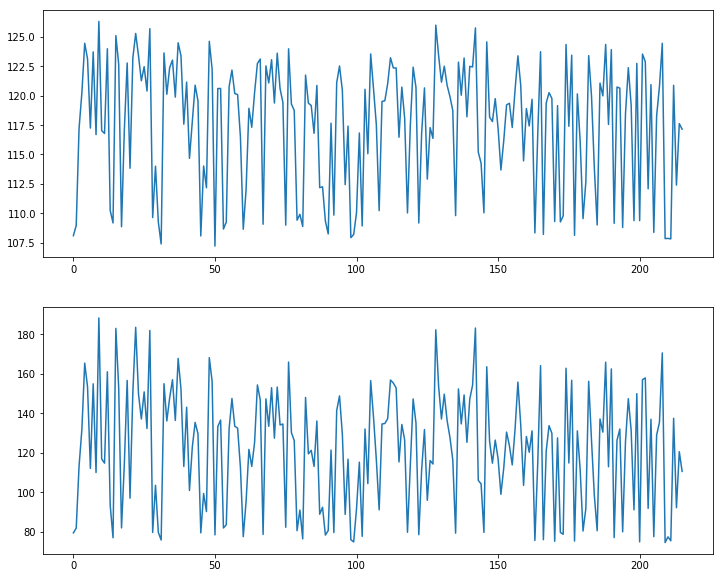

In [47]:
fig,ax = plt.subplots(2,1, figsize = (12,10))
ax[0].plot(pred.reshape(-1,1))
ax[1].plot(y_test)

In [43]:
mean_absolute_error(y_test, pred.reshape(-1,1))

20.355340475859467

In [46]:
from math import sqrt
sqrt(mean_squared_error(y_test, pred.reshape(-1,1)))

24.2465476264367